In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

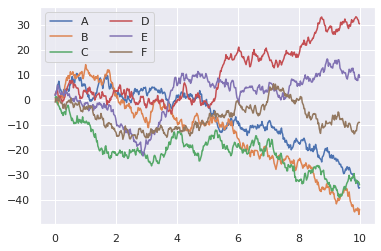

In [4]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500,6),0)
plt.plot(x,y)
plt.legend("ABCDEF", ncol = 2, loc = "upper left")

In [5]:
y


array([[  1.76405235,   0.40015721,   0.97873798,   2.2408932 ,
          1.86755799,  -0.97727788],
       [  2.71414076,   0.2488    ,   0.87551913,   2.6514917 ,
          2.01160156,   0.47699563],
       [  3.47517849,   0.37047502,   1.31938237,   2.98516603,
          3.50568063,   0.27183736],
       ...,
       [-34.82533536, -44.37245964, -32.86660099,  31.93843765,
          9.67250307,  -9.16537805],
       [-35.4875268 , -45.95006671, -33.20716103,  30.63521756,
         10.13925372,  -9.00427173],
       [-35.16749487, -43.87089005, -34.11462701,  30.44281336,
          8.92673797,  -9.08487024]])

## Exploring Seaborn Plots

In [9]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]], size = 2000)
data = pd.DataFrame(data, columns=["x","y"])

data

,x,y
0,0.348344,0.141597
1,1.048645,2.177104
2,-2.765507,-0.537429
3,-2.281142,0.430374
4,-0.659326,-0.781777
...,...,...
1995,3.437469,3.411953
1996,0.703789,0.879907
1997,-1.922770,-3.964580
1998,-1.584174,-1.596185


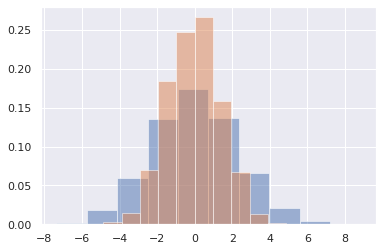

In [13]:
for col in "xy":
  plt.hist(data[col],density = True, alpha = 0.5)

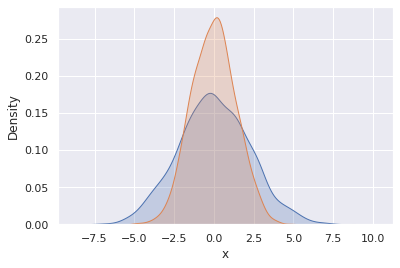

In [14]:
#Lets use kernel density estimation for visualizing same data

for col in "xy":
  sns.kdeplot(data[col],shade = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


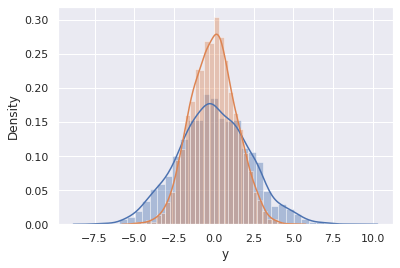

In [15]:
#Lets know bring KDE PLOT and HISTOGRAM for visualizing our previous same data

sns.distplot(data["x"])
sns.distplot(data["y"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


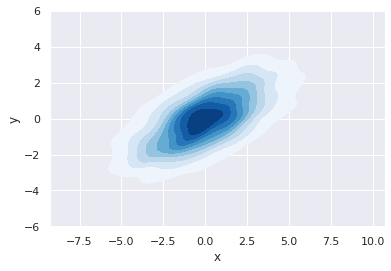

In [39]:
#Lets visualize two-dimentional KDE plot using our whole data

sns.kdeplot(data["x"],data["y"], cmap = "Blues",color = "r", shade = True, shade_lowest = False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


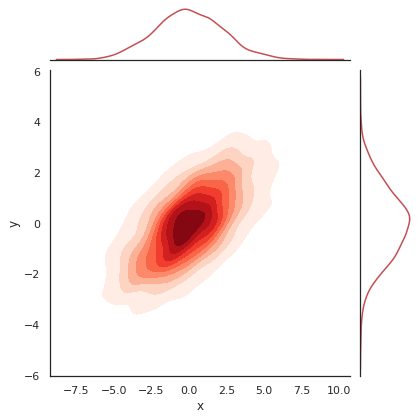

In [35]:
with sns.axes_style("white"):
  sns.jointplot("x","y",data,kind = "kde",color='r', shade=True, 
            cmap="Reds", shade_lowest=False,)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


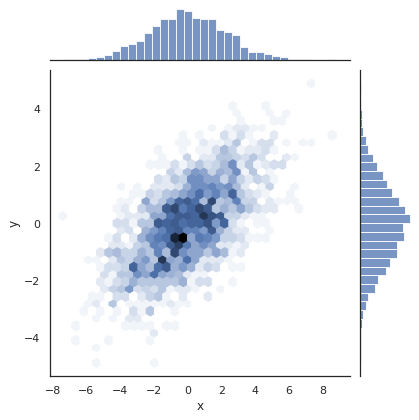

In [41]:
#Let's modify our previous graph with some more styles

with sns.axes_style("white"):
  sns.jointplot("x","y",data,kind = "hex")

## Pair Plots

In [42]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


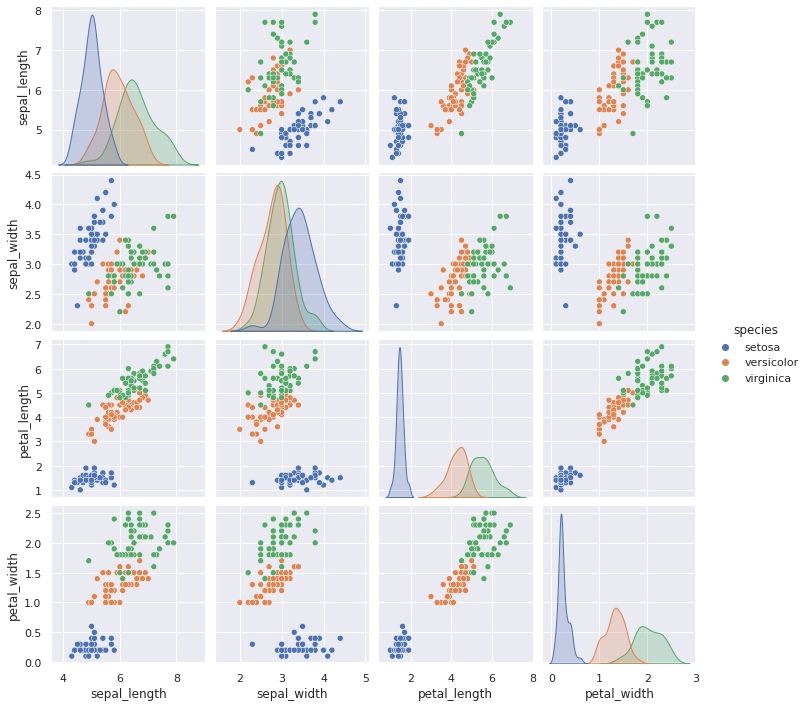

In [45]:
sns.pairplot(iris, hue = "species",size = 2.5)

## Faceted Histograms

In [46]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


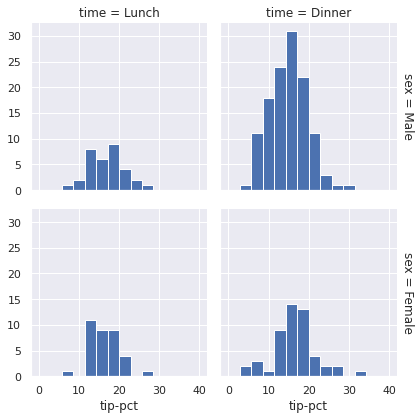

In [48]:
tips["tip-pct"] = 100 * tips["tip"] / tips["total_bill"]

grid = sns.FacetGrid(tips, row = "sex",col = "time",margin_titles=True)
grid.map(plt.hist, "tip-pct", bins = np.linspace(0,40,15))

## Factor Plots

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


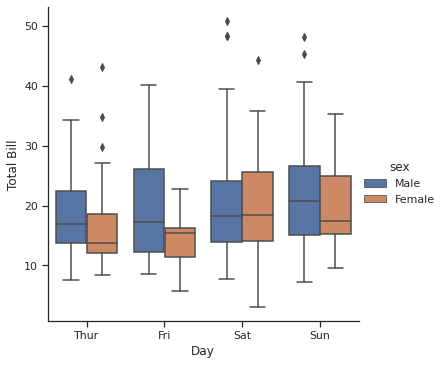

In [49]:
with sns.axes_style(style = "ticks"):
  g = sns.factorplot("day","total_bill","sex",data = tips,kind = "box")
  g.set_axis_labels("Day","Total Bill")

## Joint Distributions

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


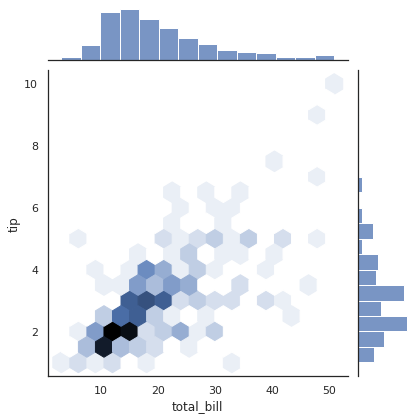

In [52]:
# With this current tips data example,let's visualize our code using plt.joinplot()

with sns.axes_style("white"):
  sns.jointplot("total_bill", "tip", data = tips,kind = "hex")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


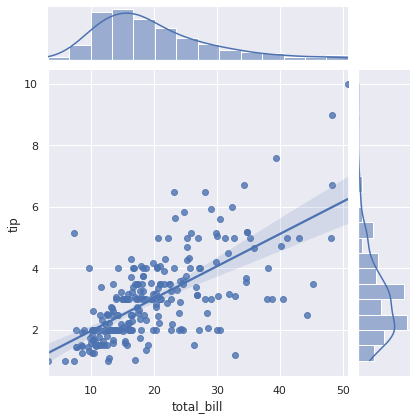

In [53]:
#Let's use another style pattern in the same dataset

sns.jointplot("total_bill","tip",data = tips,kind = "reg")

## Bar Plots

In [54]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


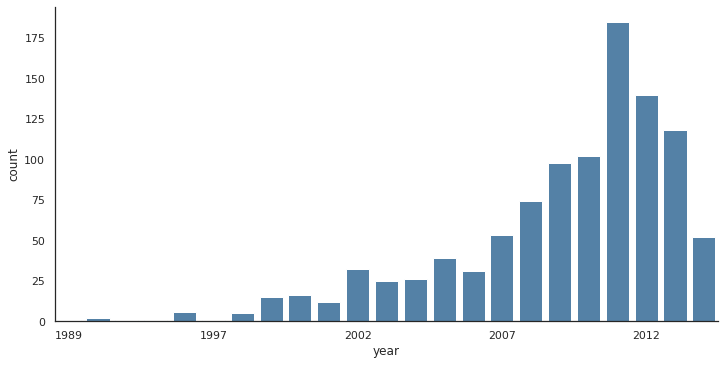

In [56]:
with sns.axes_style("white"):
  g = sns.factorplot("year",data = planets,aspect = 2,kind = "count",color = "steelblue")
  g.set_xticklabels(step = 5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


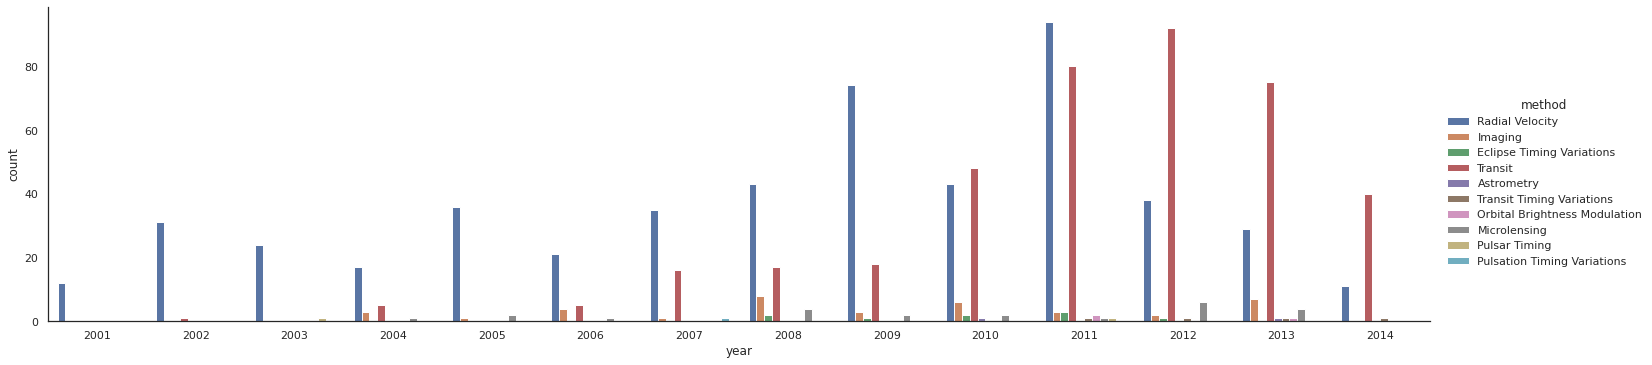

In [58]:
with sns.axes_style("white"):
  g = sns.catplot("year",data = planets,aspect = 4, kind = "count",hue = "method",
                     order = range(2001,2015))
  